Filename: C:\Users\febin\.astropy\cache\download\url\a80f1cdfc661a5a1e6cfefba35b89579\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (5250, 5250)   float32   


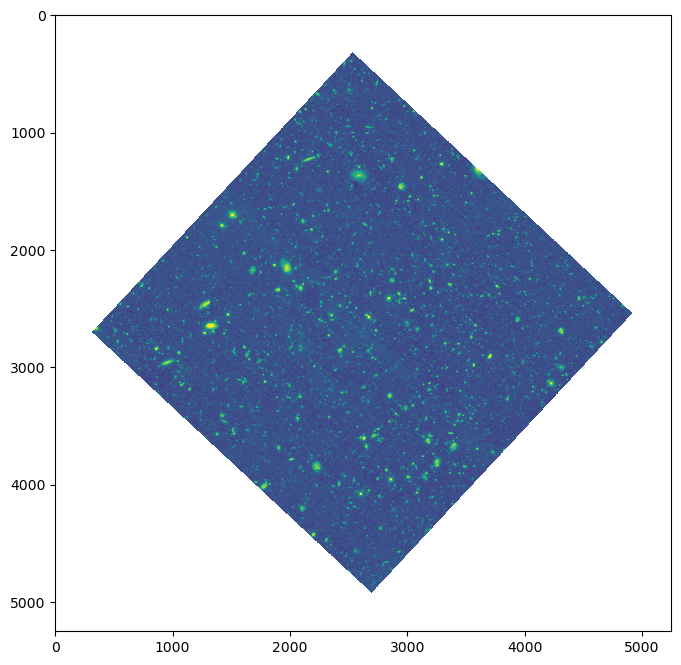

In [33]:
from astropy.io import fits  # Library for reading FITS files
import numpy as np
url = 'https://archive.stsci.edu/pub/hlsp/xdf/hlsp_xdf_hst_acswfc-60mas_hudf_f435w_v1_sci.fits'
with fits.open(url) as hdulist:  # Open the FITS file
    hdulist.info()  # Show basic info about the file
    data = hdulist[0].data  # Extract image data (a 2D array)
    header = hdulist[0].header  # Extract metadata
from astropy.nddata import CCDData
import astropy.units as u

unit = u.electron / u.s  # The unit of the image (brightness measured in electrons per second)
mask = data == 0  # Masking bad pixels (where pixel value is 0)
xdf_image = CCDData(data, unit=unit, meta=header, mask=mask)  # Store the image properly

import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize
import numpy as np

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))  # Create a figure with one subplot
norm_image = ImageNormalize(vmin=1e-4, vmax=5e-2, stretch=LogStretch(), clip=False)  # Normalize brightness
cmap = plt.get_cmap('viridis')  # Use the 'viridis' color map
cmap.set_bad('white')  # Show bad pixels as white

xdf_image_clipped = np.clip(xdf_image, 1e-4, None)  # Clip values for better contrast

fitsplot = ax1.imshow(np.ma.masked_where(xdf_image.mask, xdf_image_clipped), 
                      norm=norm_image, cmap=cmap)  # Plot the image
